<a href="https://colab.research.google.com/github/soorajpu12/LSTproject/blob/master/lst_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from osgeo import gdal
from osgeo import osr

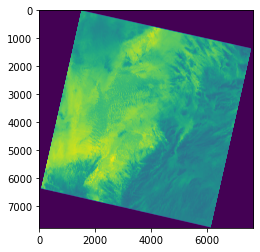

In [2]:
image = mpimg.imread('/content/LC08_L1GT_029030_20200309_20200314_01_T2_B10.TIF')
imgplot = plt.imshow(image)
plt.show()

In [3]:
image.shape

(7791, 7671)

In [0]:
def DN_to_BrightnessTemp(image, M , A , k1, k2):
    
    # image = Band x landsat 8 image
    # M = Band-specific multiplicative rescaling factor from the image folder metadata (RADIANCE_MULT_BAND_x, where x is the band number).
    # A = Band-specific additive rescaling factor from the image folder metadata (RADIANCE_ADD_BAND_x, where x is the band number).
    # k1 = Band-specific thermal conversion constant from the image folder metadata (K1_CONSTANT_BAND_x, where x is the thermal band number)
    # k2 = Band-specific thermal conversion constant from the image folder metadata (K2_CONSTANT_BAND_x, where x is the thermal band number
    
    TOA_radiance = np.zeros(image.shape)
    brightness_temp = np.zeros(image.shape)        
    TOA_radiance = (M * image) + A
    # The minus 273.15 below is so as to obtain the result in degree celcius
    brightness_temp = (k2 / (np.log((k1 / TOA_radiance) + 1))) - 273.15
    return brightness_temp

In [0]:
lst_31= DN_to_BrightnessTemp(image, 0.0003342 , 0.1, 774.8853, 1321.0789) 
# these values are obtained from the .MTL file

In [6]:
lst_31.shape

(7791, 7671)